#LVC 1: Practical Application - Fashion MNIST

In this practical application notebook, we will work with fashion MNIST dataset to carry out a classification exercise using Artificial Neural Networks.

## About the dataset

The dataset, Fashion MNIST, is a collection of apparel images falling into several classes. 
Classes have the following meanings with Tshirt/Top represented as a 0 and an Ankle Boot as 9. 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Objective

In this exercise, we will create a simple ANN model to classify the images into some categories

## Toolkit

We will use TensforFlow, tensorflow implementation of keras on google colab for this exercise.


### Import Libraries

In [ ]:
import warnings
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
tf.__version__

'2.3.0'

### Collect Data

Lets import the data from the tf.kears.datasets and prepare the train and the test set.

In [ ]:
#Load the data

(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- This suggests that there are 60000 images of size 28\*28 in the training set and 10000 images of size 28*28 in the test set.
- Note that we will need to flatten these images.
- Let us now explore the classes present in the dataset.

In [ ]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- Suggests that the train set has 10 classes each class denoting one type of apparel.

### Encoding the target variables

- We need to one hot encode the target variables to be able to form the training target vector.
- Hint: check tf.keras.utils.to_categorical() - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
y_train = tf.keras.utils.to_categorical(trainY,num_classes=10)
y_test = tf.keras.utils.to_categorical(testY,num_classes=10)

#lets have a look at the shapes of all the all the data sets

X_train.shape, y_train.shape, X_test.shape, y_test.shape



((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [ ]:
# let us also normalise the pixel values by dividing each value by 255.

X_train = X_train/255
X_test = X_test/255

### Visualization
- Now, let us visualise the data items.
- We will visualize first 24 images in the training dataset


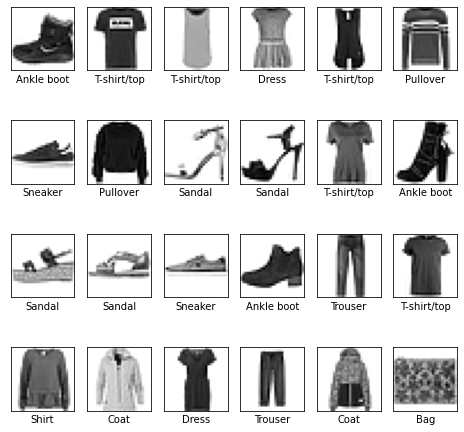

In [ ]:
import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

### Model Building

- We will now start with the model building process.
- We will create a model with
 - A layer to flatten the input
 - A hidden layer with 64 nodes (You can play around with this number) and 'relu' activation.
 - Output layer with 10 nodes 

In [1]:
28*28

784

In [ ]:
#use input shape of 28,28 or 784
#dont use flatten

In [ ]:
# Initialize sequenial model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Let us now compile the model.
- We will use 'adam' optimization and SparseCategoricalCrossentropy loss as the loss. We will track the accuracy metric.

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [ ]:
# let us now fit the model

fit_history = model_1.fit(X_train, y_train,validation_split=0.1, verbose=1, epochs=10, batch_size=64)

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 0.5641 - accuracy: 0.8048 - val_loss: 0.4452 - val_accuracy: 0.8432
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4148 - accuracy: 0.8542 - val_loss: 0.4060 - val_accuracy: 0.8530
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3750 - accuracy: 0.8686 - val_loss: 0.3702 - val_accuracy: 0.8670
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3504 - accuracy: 0.8748 - val_loss: 0.3577 - val_accuracy: 0.8730
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3321 - accuracy: 0.8806 - val_loss: 0.3455 - val_accuracy: 0.8762
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3137 - accuracy: 0.8871 - val_loss: 0.3447 - val_accuracy: 0.8805
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3053 - accuracy: 0.8888 - val_loss: 0.3404 - val_accuracy: 0.8803
Epoch 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Evaluate the model on the test set



In [ ]:
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred = np.argmax(model_1.predict(X_test), axis = -1)
test_pred

313/313 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8720


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testY, test_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.89      0.88      0.88      1000
           4       0.75      0.84      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.80      0.49      0.61      1000
           7       0.93      0.94      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY, test_pred)

array([[905,   2,  15,  17,   7,   0,  41,   0,  13,   0],
       [  3, 974,   1,  16,   3,   0,   2,   0,   1,   0],
       [ 22,   3, 808,  15, 117,   0,  31,   0,   4,   0],
       [ 38,  16,  15, 878,  35,   0,  14,   0,   4,   0],
       [  0,   1,  97,  26, 840,   0,  30,   0,   6,   0],
       [  0,   0,   0,   1,   0, 932,   0,  41,   5,  21],
       [230,   1, 120,  30, 109,   0, 494,   0,  16,   0],
       [  0,   0,   0,   0,   0,   9,   0, 942,   1,  48],
       [  2,   0,   5,   5,   4,   1,   3,   4, 976,   0],
       [  0,   0,   0,   1,   0,   3,   1,  23,   1, 971]])

### Further Iterations to model building
- Lets change the learning rate and epochs and observe the effect on accuracy on the earlier network.
- Lets build a bigger network with the new learning rate and epochs.

In [ ]:
# Initialize sequenial model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
fit_history_2 = model_2.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 2)

Epoch 1/30
844/844 - 2s - loss: 0.5629 - accuracy: 0.8074 - val_loss: 0.4682 - val_accuracy: 0.8305
Epoch 2/30
844/844 - 2s - loss: 0.4098 - accuracy: 0.8557 - val_loss: 0.4007 - val_accuracy: 0.8553
Epoch 3/30
844/844 - 2s - loss: 0.3708 - accuracy: 0.8693 - val_loss: 0.3714 - val_accuracy: 0.8643
Epoch 4/30
844/844 - 2s - loss: 0.3433 - accuracy: 0.8774 - val_loss: 0.3490 - val_accuracy: 0.8748
Epoch 5/30
844/844 - 1s - loss: 0.3265 - accuracy: 0.8816 - val_loss: 0.3534 - val_accuracy: 0.8767
Epoch 6/30
844/844 - 2s - loss: 0.3105 - accuracy: 0.8872 - val_loss: 0.3483 - val_accuracy: 0.8800
Epoch 7/30
844/844 - 2s - loss: 0.3009 - accuracy: 0.8905 - val_loss: 0.3432 - val_accuracy: 0.8753
Epoch 8/30
844/844 - 2s - loss: 0.2895 - accuracy: 0.8948 - val_loss: 0.3482 - val_accuracy: 0.8793
Epoch 9/30
844/844 - 2s - loss: 0.2810 - accuracy: 0.8980 - val_loss: 0.3260 - val_accuracy: 0.8835
Epoch 10/30
844/844 - 2s - loss: 0.2728 - accuracy: 0.8999 - val_loss: 0.3217 - val_accuracy: 0.8873

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Add more nodes in the layer and add another hidden layer

In [ ]:
# Initialize sequenial model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

fit_history_3 = model_3.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, verbose = 1)

Epoch 1/30
844/844 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.8140 - val_loss: 0.4044 - val_accuracy: 0.8545
Epoch 2/30
844/844 [==============================] - 2s 3ms/step - loss: 0.3850 - accuracy: 0.8611 - val_loss: 0.4101 - val_accuracy: 0.8442
Epoch 3/30
844/844 [==============================] - 2s 3ms/step - loss: 0.3436 - accuracy: 0.8752 - val_loss: 0.3495 - val_accuracy: 0.8723
Epoch 4/30
844/844 [==============================] - 2s 3ms/step - loss: 0.3169 - accuracy: 0.8834 - val_loss: 0.3529 - val_accuracy: 0.8730
Epoch 5/30
844/844 [==============================] - 2s 2ms/step - loss: 0.3001 - accuracy: 0.8890 - val_loss: 0.3442 - val_accuracy: 0.8760
Epoch 6/30
844/844 [==============================] - 2s 2ms/step - loss: 0.2860 - accuracy: 0.8940 - val_loss: 0.3374 - val_accuracy: 0.8818
Epoch 7/30
844/844 [==============================] - 2s 3ms/step - loss: 0.2730 - accuracy: 0.8995 - val_loss: 0.3338 - val_accuracy: 0.8870
Epoch 

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


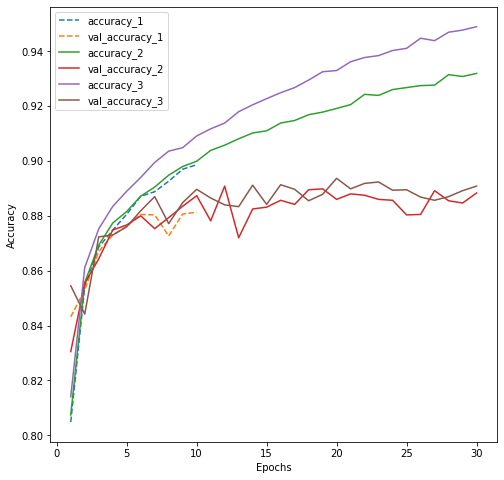

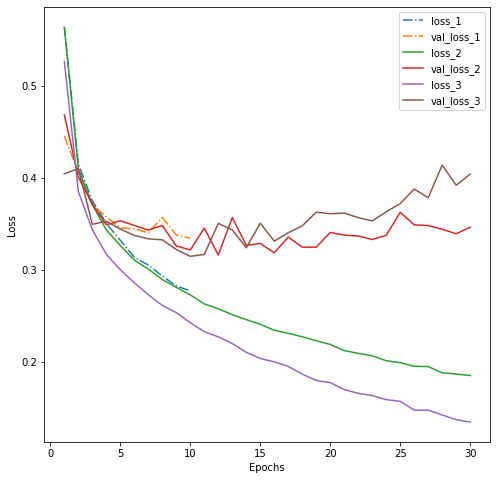

In [ ]:
dict_hist = fit_history.history
dict_hist_2 = fit_history_2.history
dict_hist_3 = fit_history_3.history

list_ep = [i for i in range(1, 11)]
list_ep30 = [i for i in range(1,31)]


plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy_1')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy_1')
plt.plot(list_ep30,dict_hist_2['accuracy'], label = 'accuracy_2')
plt.plot(list_ep30,dict_hist_2['val_accuracy'], label = 'val_accuracy_2')
plt.plot(list_ep30,dict_hist_3['accuracy'], label = 'accuracy_3')
plt.plot(list_ep30,dict_hist_3['val_accuracy'], label = 'val_accuracy_3')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'], ls = '-.', label = 'loss_1')
plt.plot(list_ep,dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')
plt.plot(list_ep30,dict_hist_2['loss'],  label = 'loss_2')
plt.plot(list_ep30,dict_hist_2['val_loss'],  label = 'val_loss_2')
plt.plot(list_ep30,dict_hist_3['loss'],  label = 'loss_3')
plt.plot(list_ep30,dict_hist_3['val_loss'],  label = 'val_loss_3')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()



In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
final_pred = np.argmax(model_3.predict(X_test), axis  = -1)

print(classification_report(testY, final_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.81      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.64      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Comments 

- We have trained 3 different models with some changes.
- The plots track the variation in the accuracies and the loss across epochs and allow us to map how better do these models generalise.
- We have observed good performance on the train set but there is some amount of overfitting in the models that gets more prominent as we increase the epochs.
- We went ahead with the model 3 and evaluated the test data on it. We got an accuracy score of 0.89 with the table above describing the class wise recall and precision.
